In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('falldetection.csv')

df.describe()


,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


In [2]:
#scalare i dati su dati reali. massimo HR registrato 208 ((208-33)/986 = 0,177)

min_hr = df['HR'].min()
df['HR'] -= min_hr
df['HR'] *= 0.177
df['HR'] += min_hr
    
df.head()

    

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,41.142,317
1,2,4059.12,2191.03,-1146.08,20,36.717,165
2,2,4773.56,2787.99,-1263.38,46,39.018,224
3,4,8271.27,9545.98,-2848.93,26,51.585,554
4,4,7102.16,14148.80,-2381.15,85,48.399,809


In [3]:
fd = df.replace({'ACTIVITY':{0:'Standing', 1:'Walking', 2:'Sitting', 3:'Falling', 4:'Cramps', 5:'Running'}})
fd.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,Falling,4722.92,4019.64,-1600.00,13,41.142,317
1,Sitting,4059.12,2191.03,-1146.08,20,36.717,165
2,Sitting,4773.56,2787.99,-1263.38,46,39.018,224
3,Cramps,8271.27,9545.98,-2848.93,26,51.585,554
4,Cramps,7102.16,14148.80,-2381.15,85,48.399,809


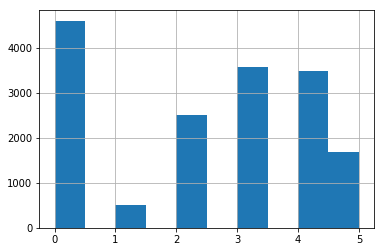

In [4]:
df['ACTIVITY'].hist()

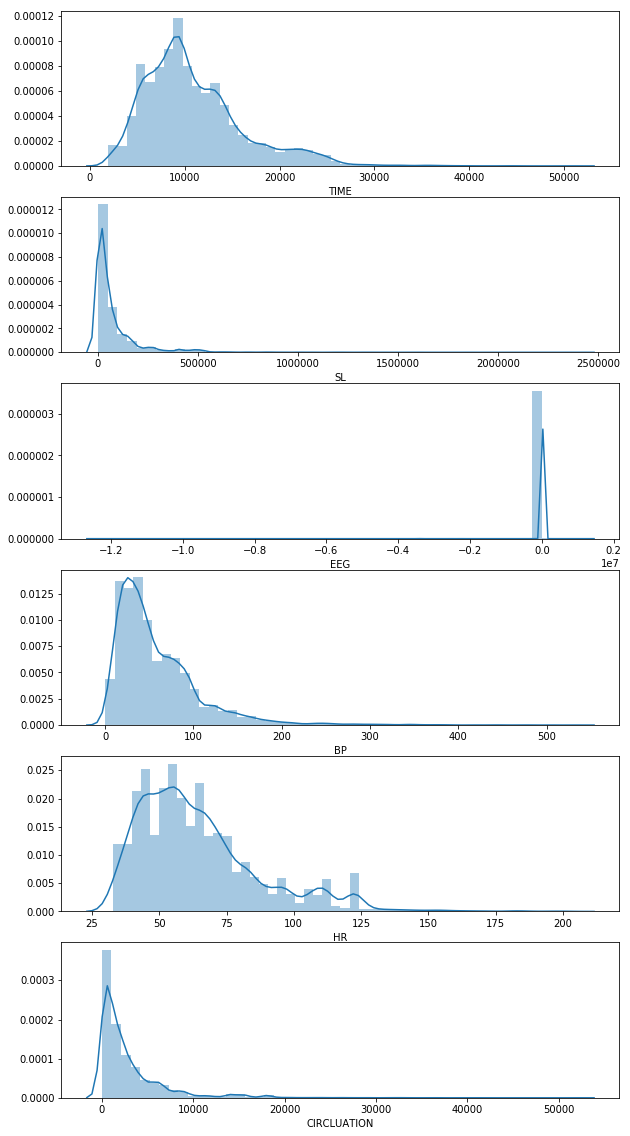

In [5]:
cols=['TIME','SL','EEG','BP','HR','CIRCLUATION']
#Distribution
fig = plt.figure(figsize=(10, 20)) # (Breite,Länge)
for i in range (0,len(cols)):
    fig.add_subplot(len(cols),1,i+1)
    sns.distplot(df[cols[i]]);

In [6]:
hr_max = df['HR'].max()
hr_min = df['HR'].min()
print(str(hr_max) + " " + str(hr_min))

201.68099999999998 33.0


In [7]:
target = df['ACTIVITY']
data = df.drop(['ACTIVITY'], axis=1)
data.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4722.92,4019.64,-1600.00,13,41.142,317
1,4059.12,2191.03,-1146.08,20,36.717,165
2,4773.56,2787.99,-1263.38,46,39.018,224
3,8271.27,9545.98,-2848.93,26,51.585,554
4,7102.16,14148.80,-2381.15,85,48.399,809


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

In [9]:
model = svm.SVC(kernel='rbf', gamma='scale')
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)

print("SVM accuracy score: ", accuracy_score(y_test, model_predictions))

SVM accuracy score:  0.32041501373207204


In [10]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_predictions = decision_tree.predict(x_test)

print("decision tree perecision: ", accuracy_score(y_test, decision_tree_predictions))

decision tree perecision:  0.687519072322246


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

print("K neighbors perecision: ", accuracy_score(y_test, knn_predictions))

K neighbors perecision:  0.6582239853524565


In [12]:
from sklearn.naive_bayes import GaussianNB

native_bayes = GaussianNB()
native_bayes.fit(x_train, y_train)
native_bayes_predictions = native_bayes.predict(x_test)

print("native bayes perecision: ", accuracy_score(y_test, native_bayes_predictions))

native bayes perecision:  0.12999694842844065
